In [1]:
from tkinter import *

Enter correct details


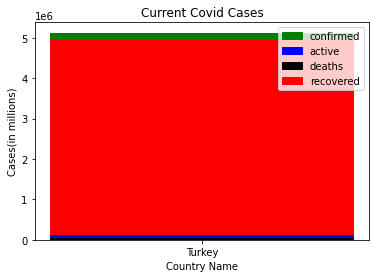

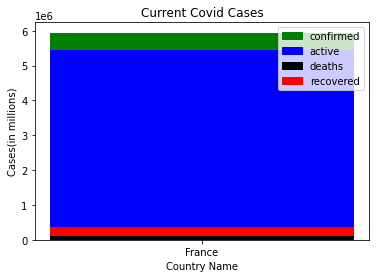

In [2]:
root = Tk()
root.geometry("350x350")
root.title("Get Covid-19 Data Country Wise")

def showdata():
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    from covid import Covid
    covid = Covid()
    cases = []
    confirmed = []
    active = []
    deaths = []
    recovered = []
    
    try:
        root.update()
        countries = data.get()
        country_names = countries.strip()
        country_names = country_names.replace(" ", ",")
        country_names = country_names.split(",")
        
        for x in country_names:
            cases.append(covid.get_status_by_country_name(x))
            root.update()
        for y in cases:
            confirmed.append(y["confirmed"])
            active.append(y["active"])
            deaths.append(y["deaths"])
            recovered.append(y["recovered"])
            
        confirmed_patch = mpatches.Patch(color = 'green', label = 'confirmed')
        active_patch = mpatches.Patch(color = 'blue', label = 'active')
        deaths_patch = mpatches.Patch(color = 'black', label = 'deaths')
        recovered_patch = mpatches.Patch(color = 'red', label = 'recovered')
        
        plt.legend(handles = [confirmed_patch, active_patch, deaths_patch, recovered_patch])
        
        for x in range(len(country_names)):
            plt.bar(country_names[x], confirmed[x], color = 'green')
            if recovered[x] > active[x]:
                plt.bar(country_names[x], recovered[x], color = 'red')
                plt.bar(country_names[x], active[x], color = 'blue')
            else:
                plt.bar(country_names[x], active[x], color = 'blue')
                plt.bar(country_names[x], recovered[x], color = 'red')
            
            plt.bar(country_names[x], deaths[x], color = 'black')
        
        plt.title('Current Covid Cases')
        plt.xlabel('Country Name')
        plt.ylabel('Cases(in millions)')
        plt.show()
        
    except Exception as e:
        print("Enter correct details")

Label(root, text = "Enter all countries names\nfor whom you want to get\ncovid-19 data", font = "Helvetica 15 bold").pack()
Label(root, text = "Enter country name:").pack()

data = StringVar()
data.set("Seperate country names using comma or space(not both!)")
entry = Entry(root, textvariable = data, width = 50).pack()
Button(root, text = "Get Data", command = showdata).pack()

root.mainloop()